In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
class Maze:
    #  setting up the maze
    def __init__(self,maze,start_position,end_position):
        self.maze=maze
        self.start_position = start_position
        self.end_position = end_position
        self.maze_width = maze_layout.shape[0]
        self.maze_height= maze_layout.shape[1]
        
    def show_maze(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.maze,cmap='gray')
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center',va='center',color='red',fontsize=20)
        plt.text(self.end_position[0], self.end_position[1], 'E', ha='center',va='center',color='green',fontsize=20)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    
        

In [14]:
maze_layout = np.array([
    [0,1,0,0,0],
    [0,1,1,1,0],
    [0,0,0,1,0],
    [1,1,0,1,1],
    [0,0,0,0,0],
])

In [15]:
maze = Maze(maze_layout,(0,0),(4,4))

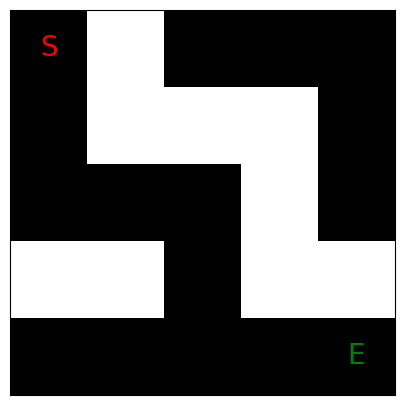

In [16]:
maze.show_maze()

In [17]:
actions = [(-1,0),(1,0),(0,-1),(0,1)] # move up, down, left and right

In [ ]:
class Agent:
    def __init__(self, maze, learning_rate=0.1,discount_factor=0.9,exploration_start=1.0,exploration_end=0.01, num_episodes=100):
        self.q_table = np.zeroes((maze.maze_height,maze.maze_width,4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes
    def get_exploration_rate(self,current_episode):
        exploration_rate = self.exploration_start * (self.exploration_end/ self.exploration_start) ** (current_episode/self.num_episodes)
        return exploration_rate
    def get_action(self,state , current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[state])
        
    def update_q_table(self, state,action,next_state,reward):
        best_next_action = np.argmax(self.q_table[next_state])
        